# Example

In [1]:
from agents import Preference,Agent,SocialNetwork
from digraphs import generate_random_dag
from random import choice
from networkx import random_regular_graph,set_node_attributes,neighbors
from parallel import update_preference_profile
from numpy.random import binomial
from math import ceil

In [2]:
#initial data for problem
n_agents = 10
n_alternatives = 8
n_neighbors = 3
n_comparisons = 4
time_horizon = 10

#genrerate random initial DAGs which have exactly n_comparisons edges
dags = [generate_random_dag(n_agents, n_alternatives) for node in range(n_agents)]

#generate 'r_median' for each agent
r_median_list = [choice(range(n_neighbors))+1 for node in range(n_agents) ]

#generate random 'update_rule' for each agent
update_rules= ['prior','posterior','join','meet']
update_rule_list = [choice(update_rules) for node in range(n_agents)]

#generate a dict of agents
agent_dict = {node: Agent(Preference(dags[node]),r_median_list[node],update_rule_list[node]) \
              for node in range(n_agents)}

#generate a random graph defining agent-agent interactions
graph = random_regular_graph(n_neighbors,n_agents)

#generate a 'SocialNetwork' instance based on 'graph' and 'agent_dict'
network = SocialNetwork(graph,agent_dict)

In [3]:
#given the inital 'network', update 
results = [network.copy()]
for t in range(1,time_horizon):
    new_agent_dict = {}
    for node in graph.nodes():
        new_agent_dict[node] = \
        Agent(network.update_preference(node),r_median_list[node],update_rule_list[node])
    results.append(SocialNetwork(graph,new_agent_dict).copy())

In [34]:
test_node = choice(range(n_agents))

print('n_agents = '+ str(n_agents))
print('n_neighbors = '+ str(n_neighbors))
print('n_algernatives = '+str(n_alternatives))
print('n_comparisons = '+str(n_comparisons))
print('\n')
print('test_node = '+ str(test_node))
print('update_rule = ' + str(agent_dict[test_node].update_rule))
print('r_median = ' + str(agent_dict[test_node].r_median))
print('\n')
for t in range(time_horizon):
    print('Time: '+str(t))
    print(results[t].get_digraph(test_node,'clean').edges)

n_agents = 10
n_neighbors = 3
n_algernatives = 8
n_comparisons = 4


test_node = 2
update_rule = posterior
r_median = 3


Time: 0
[(3, 1), (3, 4), (4, 0), (4, 2), (4, 7), (5, 9), (6, 9), (6, 2)]
Time: 1
[]
Time: 2
[]
Time: 3
[]
Time: 4
[]
Time: 5
[]
Time: 6
[]
Time: 7
[]
Time: 8
[]
Time: 9
[]


In [35]:
import networkx as nx

In [25]:
def clean_digraph(digraph):
    #for visualizing preferences
    edges_to_remove = []
    for edge in digraph.edges():
        if edge[0] == edge[1]:
            edges_to_remove.append(edge)
    digraph.remove_edges_from(edges_to_remove)
    if nx.is_directed_acyclic_graph(digraph) == True:
        return nx.transitive_reduction(digraph)
    else:
        return digraph

# Plots

In [12]:
import matplotlib.pyplot as plt
from networkx import draw_networkx_nodes,draw_networkx_edges,draw_networkx_labels,circular_layout

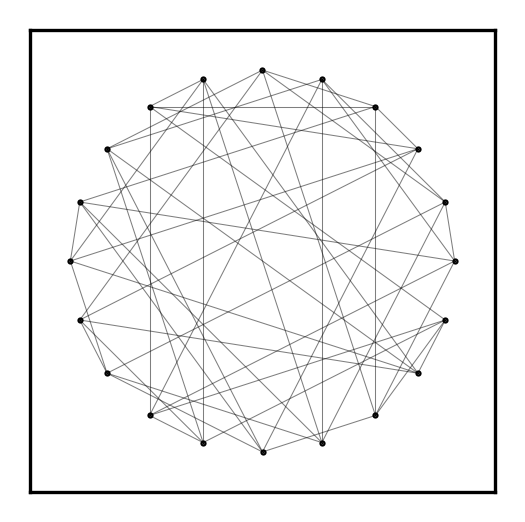

In [13]:
plt.figure(figsize=[2,2],dpi=300)
pos = circular_layout(graph)
draw_networkx_nodes(graph,pos,node_color='black',node_size=0.25)
draw_networkx_edges(graph,pos,width=0.25,alpha=0.5)
plt.show()